# Подготовка к заданиям.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset = pd.read_csv(os.path.join('data', 'titanic.csv')) # Загрузил датасет из файла, который лежит в папке data

In [3]:
pd.options.mode.chained_assignment = None # Установил режим, который позвадяет менять элементы датасета без предупреждений

## Задание №2.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
N = 891 # Задал константу, которая равна количеству строк в датасете

Запустив метод info у датасета можно увидеть, что значения пропущемы в следующих стобцах:
1. age (177)
2. embarked (2)
3. deck (688)
4. embark_tpwn (2)

Заполним пропущенные ячейки, выбрав для каждого столбца свой способ.

### 1. age.

Так как пропущенных значений в столбце age достаточно много я решил заполнить их не просто средним значением по столбцу, а также связать значения в каждой ячейке с другими из той же строки, по этому:

Я создал словарь в котором храниться информация о каждом столбце (не включая age), ключами которого являются сами столбцы, а значения это тоже словари, где ключи это уникальные значения из этого столбца, а значения - среднее арифметическое по тем самым значениям в столбце age

In [6]:
json = {}

for i in dataset.columns.values:
    if i != 'age':
        json[i] = {}
        s = []
        for j in dataset[i].unique():
            element = dataset[(dataset[i] == j) & (dataset['age'] != np.nan)]['age'] # Создание ограниченного датасета по двум условиям
            # 1. Значение в столбце i = j; 2. значение в t != None
            json[i][j] = element.mean()

In [7]:
for i in range(N):
    if pd.isnull(dataset['age'][i]): # Проверка на None
        s = 0
        n = 0
        for j in dataset.columns.values:
            if j != 'age':
                element = json[j][dataset[j][i]]
                if not pd.isnull(element):
                    n += 1
                    s += element
        dataset['age'][i] = s // n # Среднее по каждым столбцам

### 2. dack.

Изучив датасет и его описание, я понял, что на значения в столбце deck больше всего влияния оказывет цена билета (столбец fare), по этому
я создал словарь где каждому уникальному значению из deck я присвоил среднее значение из fair.

In [8]:
json = {}
for i in dataset['deck'].unique():
    json[i] = dataset[dataset['deck'] == i]['fare'].mean()
        
json = list(sorted(json.items(), key=lambda x: x[1])) # Превратил словарь в отсортированный массив

Теперь по значению в столбце fair я буду определять значение для столбца deck, где они неизвестны

In [9]:
for i in range(N):
    if pd.isnull(dataset['deck'][i]):
        flag = False
        fare = dataset['fare'][i]
        for j in range(len(json)):
            item, c = json[j]
            if c > fare:
                flag = True
                break
        if not flag:
            item = json[-1][0]
        else:
            if j > 0: 
                item1, c1 = item, c
                item2, c2 = json[j - 1]
                if abs(c1 - fare) > abs(c2 - fare):
                    item = item2
                else:
                    item = item1
            else:
                item = json[0][0]
        dataset['deck'][i] = item

### 3 & 4. embark_town & embarked.

Так как пропущенных значений в этих столбцах всего по 2, я заполню пропущенные ячейки рандомными значениями из соответствующих столбцов

In [10]:
for i in ['embark_town', 'embarked']:
    for j in range(N):
        if pd.isnull(dataset[i][j]):
            dataset[i][j] = np.random.choice(dataset[i])

In [11]:
dataset.info() # Все столбцы полностью заполнены !!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Задание №3.

In [12]:
n_man = len(dataset[dataset['sex'] == 'male']) # Количество людей мужского пола
n_woman = N - n_man # Количество людей женского пола
print(f'Мужчин - {n_man}.\nЖенщин - {n_woman}.\nПроцент мужчин равен {int(n_man / N * 100)}%.')

Мужчин - 577.
Женщин - 314.
Процент мужчин равен 64%.


In [13]:
n_adult_man = len(dataset[dataset['adult_male'] == True])

print(f'Взрослых мужчин - {n_adult_man}.')
print(f'Их процент от общего числа пассижиров - {int(n_adult_man / N * 100)}%.')

Взрослых мужчин - 537.
Их процент от общего числа пассижиров - 60%.


In [14]:
for titanic_class in dataset['class'].unique():
    print(f'В классе {titanic_class} ровно {len(dataset[dataset["class"] == titanic_class])} людей.')

В классе Third ровно 491 людей.
В классе First ровно 216 людей.
В классе Second ровно 184 людей.


## Задание №4.

In [15]:
dataset.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.687059,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.021849,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,0.000000,1.000000,16.000000,0.000000,0.000000,7.550000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
80%,1.000000,3.000000,38.000000,1.000000,1.000000,39.687500
90%,1.000000,3.000000,47.000000,1.000000,2.000000,77.958300


1) Так как нормальное отклонение в fare достаточно большое (выше среднего арифметического) из этого следует, что разброс по ценам достаточно большой, но посмотрев на график (отсортированный массив fare) (представлен ниже) можно понять, что большой разброс идет при больших значениях, а большинство пассажиров купило билет стоимостью в диапозоне от 0 до 50 (также это можно увидеть в процентных строчках)

2) Можно увидеть, что людей младше 50 лет не меньше 90%, также нормальное отклонение более чем в 2 раза меньше чем среднее арифметическое, а значит возраст в среднем не сильно отклоняется от среднего. Я также на графике представил распределние возрастов, на нем отчетливо видно, что людей младше 16 (примерно) и также людей страше 50 существенно меньше чем людей промежуточных возрастов, что логично.

(также есть еще пара графиков на которых представлена зависимость количества пассажиров от их возраста или цены билета)

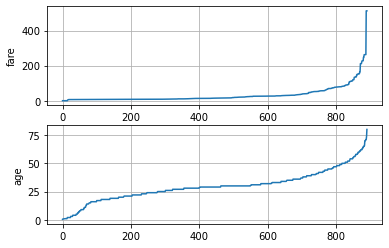

In [18]:
fare = list(sorted(dataset['fare']))
age = list(sorted(dataset['age']))
x = list(range(N))

fig, axs = plt.subplots(2, 1)

axs[0].plot(x, fare)
axs[0].set_ylabel('fare')
axs[0].grid(True)

axs[1].plot(x, age)
axs[1].set_ylabel('age')
axs[1].grid(True)

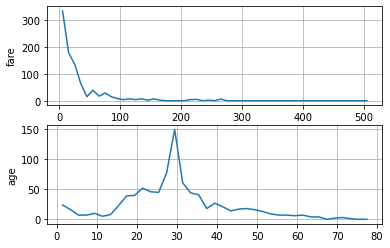

In [19]:
def get_stat(delta, col_name):
    column = dataset[col_name]
    x = []
    y = []
    for i in np.arange(min(column) + delta, max(column) - delta, 2 * delta):
        x.append(i)
        y.append(len(dataset[(dataset[col_name] >= i - delta) & (dataset[col_name] < i + delta)]))
    
    return x, y

fig, axs = plt.subplots(2, 1)

axs[0].plot(*get_stat(5, 'fare'))
axs[0].set_ylabel('fare')
axs[0].grid(True)

axs[1].plot(*get_stat(1, 'age'))
axs[1].set_ylabel('age')
axs[1].grid(True)

## Задание №5.

In [20]:
alive_ds = dataset.copy() # Создание копии основного датасета

In [21]:
alive_ds = alive_ds.loc[alive_ds['alive'] == 'yes'] # удаление строчек с теми пассажирами, которые не выжили
# alive_ds.drop(columns = ['alive'],axis = 1) # Удаление столбца alive зв ненадобностью (все значения в нем равны "yes")

In [22]:
len(alive_ds[alive_ds['alive'] == 'no']) # Проверка

0

In [23]:
alive_n = len(alive_ds)
print(f'Всего выживших - {alive_n}.')

Всего выживших - 342.


In [24]:
n_man = len(alive_ds[alive_ds['sex'] == 'male']) # Количество людей мужского пола
n_adult_man = len(alive_ds[alive_ds['adult_male'] == True])
n_woman = alive_n - n_man # Количество людей женского пола
print(f'Мужчин - {n_man}.\nЖенщин - {n_woman}.\nПроцент мужчин теперь равен {int(n_man / alive_n * 100)}%.'
      f'\nПроцент взрослых мужчин теперь равен {int(n_adult_man / alive_n * 100)}%')

Мужчин - 109.
Женщин - 233.
Процент мужчин теперь равен 31%.
Процент взрослых мужчин теперь равен 25%


Как видно, процент мужчин среди всех пассажиров уменьшился более чем в 2 раза

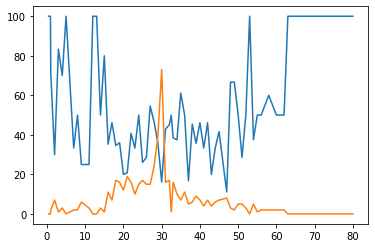

In [25]:
# Строю график смертности людей в зависимости от возраста (по x возраст из alive_ds, по y разница между количеством
# людей которые были и кторые выжили).
zn = list(sorted(alive_ds['age'].unique()))
res = []
res_2 = []
for i in zn:
    element_1 = len(alive_ds[alive_ds['age'] == i])
    element_2 = len(dataset[dataset['age'] == i])
    res.append(element_2 - element_1)
    res_2.append(100 * (element_1 / element_2))
 
plt.plot(zn, res_2)
plt.plot(zn, res)

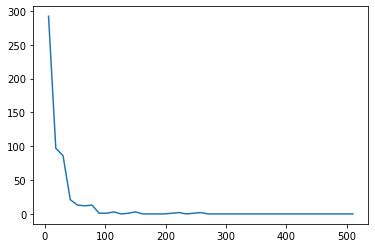

In [26]:
# Строю график смертности людей в зависимиости от того сколько они отдали за билет.
delta = 6
zn = list(range(delta, 512, 2 * delta))
res = []
for i in zn:
    element_1 = len(alive_ds[(i - delta <= alive_ds['fare']) & (alive_ds['fare'] < i + delta)])
    element_2 = len(dataset[(i - delta <= dataset['fare']) & (dataset['fare'] < i + delta)])
    res.append(element_2 - element_1)
    
plt.plot(zn, res)

In [27]:
not_alone_dataset = len(dataset[dataset['alone'] == False])
alone_dataset = N - not_alone_dataset
not_alone_alive = len(alive_ds[alive_ds['alone'] == False])
alone_alive = alive_n - not_alone_alive
not_alone_alive / not_alone_dataset, alone_alive / alone_dataset

(0.5056497175141242, 0.30353817504655495)